# Part 0: Name, NetID, Collaborators

Name: Oceana Zhu
NetID: oz2060

# Part 1

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
#pip install scikit-learn, pip install seaborn

In [2]:
#Question 1
nyc_restaurants = pd.read_csv('shared/datasets/NYC_Restaurants_small.csv')

print( nyc_restaurants.shape )
nyc_restaurants.head(2)

(5000, 26)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE.DESCRIPTION,INSPECTION.DATE,ACTION,...,RECORD.DATE,INSPECTION.TYPE,Latitude,Longitude,Community.Board,Council.District,Census.Tract,BIN,BBL,NTA
0,40397190,FRANKIE BOY'S PIZZA & SALAD,Manhattan,1367,BROADWAY,10018,2122684499,Pizza,08/01/2019,Violations were cited in the following area(s).,...,09/18/2019,Cycle Inspection / Initial Inspection,40.751928,-73.987548,105,3,10900,1015245,1.008120e+09,MN17
1,50052848,FUSION JUICE BAR,Queens,3402,36TH AVE,11106,3477384024,"Juice, Smoothies, Fruit Salads",10/18/2018,Violations were cited in the following area(s).,...,09/18/2019,Cycle Inspection / Initial Inspection,40.755386,-73.927226,401,26,5500,4009496,4.006340e+09,QN68


There are 5000 observations and 26 variables. Each observation the data collected for the different varibles for a restaurant in New York City. 

In [110]:
#Question 2
brooklyn_restaurants = (nyc_restaurants[nyc_restaurants['BORO']=='Brooklyn'])
brooklyn_restaurants.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE.DESCRIPTION,INSPECTION.DATE,ACTION,...,RECORD.DATE,INSPECTION.TYPE,Latitude,Longitude,Community.Board,Council.District,Census.Tract,BIN,BBL,NTA
2,50008983,Aita Trattoria,Brooklyn,798A,FRANKLIN AVE,11238,9179662670,Italian,02/03/2018,Violations were cited in the following area(s).,...,09/18/2019,Cycle Inspection / Initial Inspection,40.671109,-73.957819,308,35,21700,3029660,3.011810e+09,BK61
7,50011343,EMPIRE TACO CHINA,Brooklyn,2807,CROPSEY AVE,11214,7183728888,Tex-Mex,12/05/2016,Violations were cited in the following area(s).,...,09/18/2019,Cycle Inspection / Re-inspection,40.586297,-73.988245,313,47,31400,3346329,3.069160e+09,BK26
9,50066837,PECKISH,Brooklyn,49,WILLOUGHBY AVE,11205,3476894969,Café/Coffee/Tea,06/29/2019,Violations were cited in the following area(s).,...,09/18/2019,Cycle Inspection / Initial Inspection,40.691625,-73.971123,302,35,18300,3399817,3.020740e+09,BK68
16,50080626,THE BAD BAGEL,Brooklyn,40,WYCKOFF AVE,11237,9293243130,Bagels/Pretzels,12/28/2018,Violations were cited in the following area(s).,...,09/18/2019,Cycle Inspection / Re-inspection,40.705924,-73.921845,304,34,44700,3072771,3.031990e+09,BK77
22,50089691,BRUCE & ARMANI GOURMET LOUNGE,Brooklyn,189,WILSON AVE,11237,3474420365,"Latin (Cuban, Dominican, Puerto Rican, South &...",08/08/2019,Establishment re-closed by DOHMH,...,09/18/2019,Pre-permit (Operational) / Reopening Inspection,40.699349,-73.923338,304,37,42900,3073814,3.032460e+09,BK77


In [4]:
#Question 3
brooklyn_restaurants.shape[0]
#There are 1267 restaurants in Brooklyn

1267

In [5]:
#Question 4
brooklyn_restaurants["SCORE"].mean()

21.126282557221785

In [6]:
#Question 5
highestbrookrest = brooklyn_restaurants[['DBA','SCORE']]
highestbrookrest.max()

DBA      cafe paulette
SCORE              140
dtype: object

Cafe Paulette has the highet score with a score of 140. 

In [7]:
#Question 6
queens_restaurants = (nyc_restaurants[nyc_restaurants['BORO']=='Queens'])
queens_restaurants.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE.DESCRIPTION,INSPECTION.DATE,ACTION,...,RECORD.DATE,INSPECTION.TYPE,Latitude,Longitude,Community.Board,Council.District,Census.Tract,BIN,BBL,NTA
1,50052848,FUSION JUICE BAR,Queens,3402,36TH AVE,11106,3477384024,"Juice, Smoothies, Fruit Salads",10/18/2018,Violations were cited in the following area(s).,...,09/18/2019,Cycle Inspection / Initial Inspection,40.755386,-73.927226,401,26,5500,4009496,4.006340e+09,QN68
3,50090078,LA FONDA REST CORP,Queens,4911,69TH ST,11377,7182556425,Spanish,06/18/2019,Violations were cited in the following area(s).,...,09/18/2019,Pre-permit (Operational) / Initial Inspection,40.737474,-73.895927,402,30,48900,4056349,4.024350e+09,QN50
4,50002562,EXQUISITO RESTAURANT,Queens,2112,36TH AVENUE,11106,7187843505,Spanish,10/17/2017,Violations were cited in the following area(s).,...,09/18/2019,Cycle Inspection / Initial Inspection,40.759769,-73.936581,401,26,3300,4004269,4.003480e+09,QN68


In [8]:
queens_restaurants.shape[0]

1188

In [9]:
queens_restaurants["SCORE"].mean()

19.532828282828284

In [10]:
highestqueensrest = queens_restaurants[['DBA','SCORE']]
highestqueensrest.max()

DBA      ZYARA RESTAURANT
SCORE                 112
dtype: object

There are fewer restaurants in Queens and the mean score in Queens is lower than the mean score in Brooklyn. Furthermore, the highest scoring restaurant in Queens has a lower score than the highest scoring restaurant in Brooklyn. 

# Part 2: Grouping, Summarizing, and Visualizing Data

In [11]:
#Question 7
brooklyn_restaurants = (nyc_restaurants[nyc_restaurants['BORO']=='Brooklyn'])
print(brooklyn_restaurants.shape[0])
queens_restaurants = (nyc_restaurants[nyc_restaurants['BORO']=='Queens'])
print(queens_restaurants.shape[0])
bronx_restaurants = (nyc_restaurants[nyc_restaurants['BORO']=='Bronx'])
print(bronx_restaurants.shape[0])
si_restaurants = (nyc_restaurants[nyc_restaurants['BORO']=='Staten Island'])
print(si_restaurants.shape[0])
man_restaurants = (nyc_restaurants[nyc_restaurants['BORO']=='Manhattan'])
print(man_restaurants.shape[0])

1267
1188
428
163
1954


Manhattan has the most number of restaurants in this dataset and Staten Island has the fewest number of restaurants in this dataset. 

In [12]:
#Question 8
print(brooklyn_restaurants["SCORE"].mean())
print(queens_restaurants["SCORE"].mean())
print(bronx_restaurants["SCORE"].mean())
print(si_restaurants["SCORE"].mean())
print(man_restaurants["SCORE"].mean())

21.126282557221785
19.532828282828284
20.572429906542055
19.625766871165645
20.195496417604915


Brooklyn has the highest average score and Queens has the lowest average score.

<AxesSubplot: xlabel='BORO'>

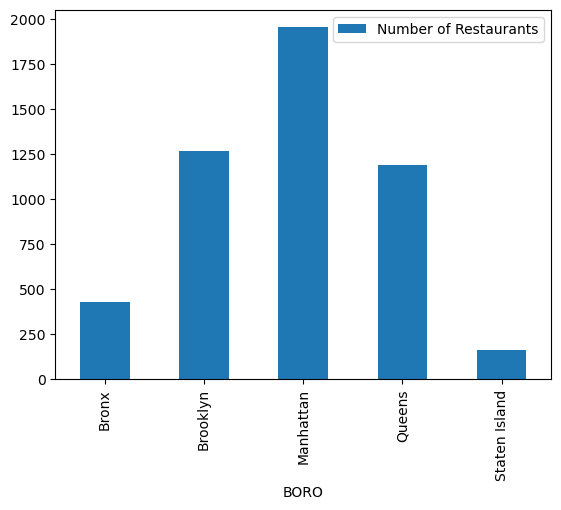

In [14]:
#Question 9
restbyboro = nyc_restaurants.groupby(['BORO'])['BORO'].size().reset_index(name='Number of Restaurants')
restbyboro.plot.bar("BORO","Number of Restaurants")

The bar graph depicts the number of restaurants in each borough with number of restaurants on the y-axis and the borough on the x-axis. Based on the bar graph it is clear that Manhattan has the greatest number of restaurants by a large margin whereas Staten Island has the fewest number of restaurants. Additionally, we can observe that Brooklyn and Queens are close to each other in the number of restaurants that they have. 

<AxesSubplot: xlabel='BORO'>

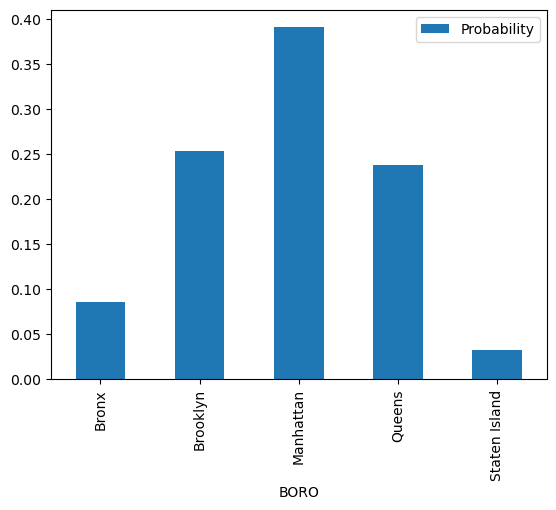

In [15]:
#Question 10
restbyboro['Probability'] = (restbyboro['Number of Restaurants'] / nyc_restaurants.shape[0])
restbyboro.plot.bar("BORO","Probability")
#describe

The bar graph depicts the proportion of total restaurants in the sample that restaurants from each borough takes up with proportion on the y-axis and borough on the x-axis. Based on the bar graph it is clear that Manhattan has the highest proportion of restaurants by a large margin whereas Staten Island has the lowest proportion of restaurants. Additionally, we can observe that Brooklyn and Queens are close to each other in their proportions of restaurants.

/tmp/ipykernel_53/2427944870.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nyc_restaurants['SCORE'], hist=True, kde=True, bins = 10)


<AxesSubplot: xlabel='SCORE', ylabel='Density'>

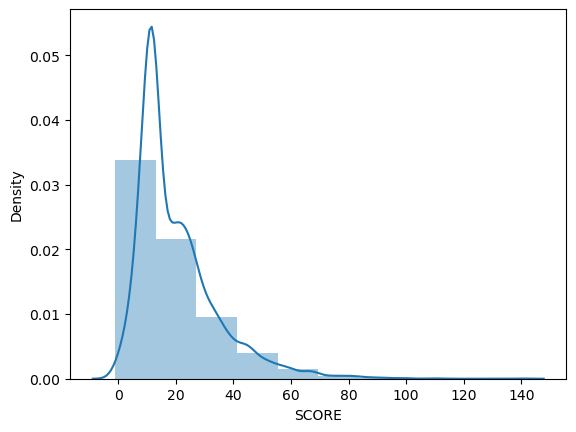

In [16]:
#Question 11
sns.distplot(nyc_restaurants['SCORE'], hist=True, kde=True, bins = 10)

The histogram depicts the distribution of scores across the restaurants in the dataset. The x-axis is the score of the restaurants and the y-axis is the density. There are ten bins and the distribution appears to be skewed right. The density represents the frequency of a score in the dataset. 

# Part 3: More practice with a different dataset

In [17]:
#Question 12
payroll= pd.read_csv('shared/datasets/NYC_Payroll_small.csv')

print( payroll.shape )
payroll.head(2)

(5000, 16)


,Fiscal.Year,Payroll.Number,Agency.Name,Last.Name,First.Name,Agency.Start.Date,Work.Location.Borough,Title.Description,Leave.Status.as.of.June.30,Base.Salary,Pay.Basis,Regular.Hours,Regular.Gross.Paid,OT.Hours,Total.OT.Paid,Total.Other.Pay
0,2019,300,BOARD OF ELECTION POLL WORKERS,WORKMAN,EULENE,07/25/2013,MANHATTAN,ELECTION WORKER,ACTIVE,1.00,per Hour,0.0,1450.00,0.0,0.0,0.0
1,2019,466,COMMUNITY COLLEGE (MANHATTAN),GEORGE,MICHAEL,02/01/2004,MANHATTAN,NON-TEACHING ADJUNCT IV,ACTIVE,58.26,per Hour,6.0,349.56,0.0,0.0,0.0


There are 5000 rows and 16 columns. Each row corresponds to one worker and the data that was collected about them for each of the different variables. Three variabels are Agency.Name, Title.Description, and Leave.Status.as.of.June.30. These are all categorical variables. 

In [18]:
#Question 13
print(payroll.groupby('Title.Description')['Title.Description'].agg('nunique'))

Title.Description
ACCOUNTANT                                      1
ADJUNCT ASSISTANT PROFESSOR                     1
ADJUNCT ASSOCIATE PROFESSOR                     1
ADJUNCT COLLEGE LAB TECH                        1
ADJUNCT LECTURER                                1
                                               ..
VOTING MACHINE TECHNICIAN                       1
WARDEN                                          1
WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92    1
WARDEN-DEPUTY WARDEN TED < 11/1/92              1
YOUTH DEVELOPMENT SPECIALIST                    1
Name: Title.Description, Length: 348, dtype: int64


There are 348 different titles among employees in this dataset. 

In [19]:
print(payroll.groupby('Title.Description')['Title.Description'].value_counts())

Title.Description                             Title.Description                           
ACCOUNTANT                                    ACCOUNTANT                                        5
ADJUNCT ASSISTANT PROFESSOR                   ADJUNCT ASSISTANT PROFESSOR                      23
ADJUNCT ASSOCIATE PROFESSOR                   ADJUNCT ASSOCIATE PROFESSOR                       4
ADJUNCT COLLEGE LAB TECH                      ADJUNCT COLLEGE LAB TECH                         10
ADJUNCT LECTURER                              ADJUNCT LECTURER                                109
                                                                                             ... 
VOTING MACHINE TECHNICIAN                     VOTING MACHINE TECHNICIAN                         4
WARDEN                                        WARDEN                                            1
WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92  WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92      4
WARDEN-DEPUTY WARDEN TED < 

The above table shows the count of how many employees there are for each title. 

In [103]:
print(payroll.groupby('Title.Description')['Regular.Gross.Paid'].agg('mean'))

Title.Description
ACCOUNTANT                                       57421.972000
ADJUNCT ASSISTANT PROFESSOR                      17051.261304
ADJUNCT ASSOCIATE PROFESSOR                      20517.300000
ADJUNCT COLLEGE LAB TECH                          6613.216000
ADJUNCT LECTURER                                 13448.450092
                                                    ...      
VOTING MACHINE TECHNICIAN                        31528.480000
WARDEN                                          190982.730000
WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92    113187.635000
WARDEN-DEPUTY WARDEN TED < 11/1/92              121657.380000
YOUTH DEVELOPMENT SPECIALIST                     28370.638235
Name: Regular.Gross.Paid, Length: 348, dtype: float64
Regular.Gross.Paid    190982.73
Name: WARDEN, dtype: float64


The above table shows the average value of the Regular.Gross.Paid column for each title. 

In [106]:
countdata = payroll.groupby('Title.Description')['Title.Description'].agg(['count'])
count = pd.DataFrame(countdata)
print(count.loc[count['count'].idxmax()])

count    1065
Name: ELECTION WORKER, dtype: int64


The Election Worker title has the most employees with 1065 employees. 

In [107]:
paydata = payroll.groupby('Title.Description')['Regular.Gross.Paid'].agg(['mean'])
pay = pd.DataFrame(paydata)
print(pay.loc[pay['mean'].idxmax()])

mean    190982.73
Name: WARDEN, dtype: float64


The Warden title has the highest pay with an average Regular.Gross.Paid of 190982.73

In [109]:
#Question 14
print(payroll.groupby('Agency.Name')['Regular.Gross.Paid'].agg(['mean']))

                                         mean
Agency.Name                                  
ADMIN FOR CHILDREN'S SVCS        54271.496296
ADMIN TRIALS AND HEARINGS        33893.602963
BOARD OF CORRECTION             177241.790000
BOARD OF ELECTION                29545.392059
BOARD OF ELECTION POLL WORKERS     843.266629
BOROUGH PRESIDENT-BROOKLYN       18852.163333
BOROUGH PRESIDENT-QUEENS         64595.900000
BOROUGH PRESIDENT-STATEN IS      76209.135000
BRONX COMMUNITY BOARD #6        102886.480000
BRONX COMMUNITY BOARD #8          5195.440000
BRONX DISTRICT ATTORNEY          54798.213043
BROOKLYN COMMUNITY BOARD #1      61785.490000
BROOKLYN COMMUNITY BOARD #17     31464.620000
BROOKLYN COMMUNITY BOARD #2      43048.780000
BUSINESS INTEGRITY COMMISSION    47109.990000
CAMPAIGN FINANCE BOARD           50237.837500
CITY CLERK                       37866.296667
CITY COUNCIL                     63871.742000
CIVIL SERVICE COMMISSION         97531.780000
CIVILIAN COMPLAINT REVIEW BD     5

I grouped the dataframe by Agency Name and found the mean Regular.Gross.Paid for each agency. From this data, we can see that the Board of Correction Agency has the highest pay. 

<AxesSubplot: xlabel='Work.Location.Borough'>

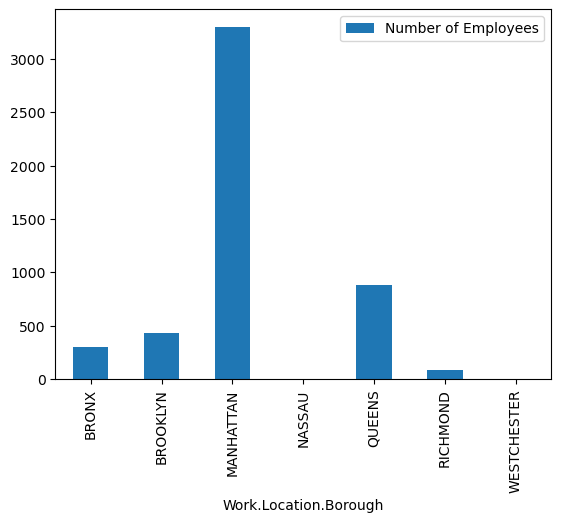

In [23]:
#Question 15
empbyboro = payroll.groupby('Work.Location.Borough')['Work.Location.Borough'].size().reset_index(name='Number of Employees')
empbyboro.plot.bar("Work.Location.Borough","Number of Employees")

From this visualization, I can glean that the majority of workers in this dataset work in Manhattan as the bar representing the number of employees in Manhattan is significantly larger than the bars of the other boroughs. 

array([[<AxesSubplot: title={'center': 'Regular.Gross.Paid'}>]],
      dtype=object)

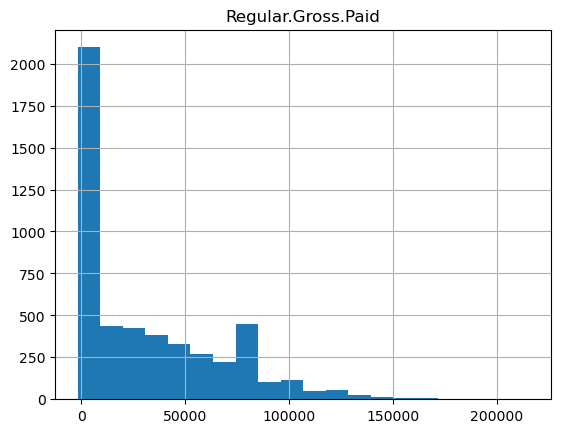

In [111]:
#Question 16
payroll.hist(column='Regular.Gross.Paid', bins=20)

I chose 20 bins becuase after experimenting with different numbers of bins I felt that 20 bins created a visual that adequately showed how the pay was distributed without being overly simplistic or overwhelming. From this distribution, I can observe that the distribution is skewed right, meaning that the Regular.Gross.Paid for workers in this dataset tends to be closer to the 0-50000 range than the >50000 range. 

/tmp/ipykernel_53/3341064447.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(payroll['Regular.Gross.Paid'], hist=True, kde=True, bins = [0,50,80,100, 200, 300, 350, 500, 700, 1000, 10000,50000,200000])


<AxesSubplot: xlabel='Regular.Gross.Paid', ylabel='Density'>

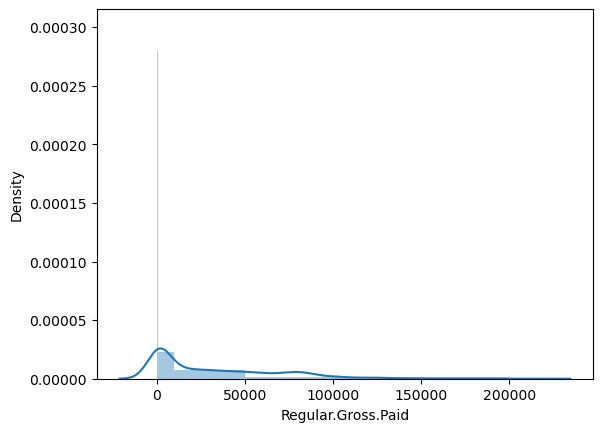

In [136]:
#Question 17
sns.distplot(payroll['Regular.Gross.Paid'], hist=True, kde=True, bins = [0,50,80,100, 200, 300, 350, 500, 700, 1000, 10000,50000,200000])

I used 12 bins and the endpoints of the bins are 0,50,80,100, 200, 300, 350, 500, 700, 1000, 10000,50000,200000. I chose these bins because based on what I had observed from the previous histogram, there is a clear rightward skew. Thus, I wanted to there to be smaller increments between bins on the lower end of Regular.Gross.Paid to help distribute the data more evenly. From this visualization, I glean that there is a clear rightward skew in the data, meaning that more workers are have low Regular.Gross.Paid values. Despite defining the bins to attempt to account for this skew, I still notice that the density of workers whose Regular.Gross.Paid falls into the bins of smaller value is significantly greater. 

# Section 4: Models (Part 1)

In [26]:
#Question 18
geyser = sns.load_dataset('geyser')

print( geyser.shape )
geyser.head(2)

(272, 3)


,duration,waiting,kind
0,3.6,79,long
1,1.8,54,short


There are 272 observations and 3 variables. The variables of duration and waiting are integers while the variable of kind is categorical. Each observation corresponds to an eruption of the Old Faithful Geyser in Yellowstone National Park. 

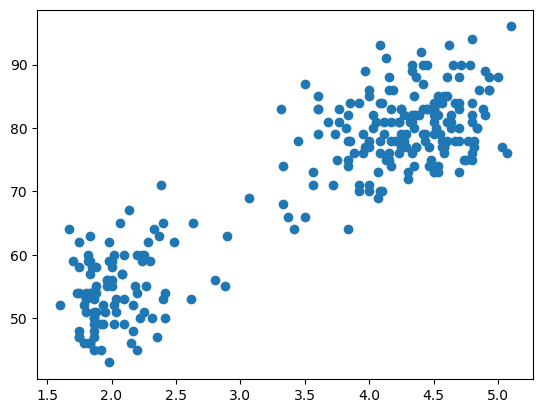

In [29]:
#Question 19 
plt.scatter(geyser['duration'], geyser['waiting'])

In [31]:
x=geyser['duration']
x.corr(geyser['waiting'])

0.9008111683218127

Based on the scatterplot there seems to be a positive linear relationship between the variables of duratiion and waiting. The value of the correlation coefficient is 0.9008111683218127 and it confirms that there is a positive linear relationship between the variables of duration and waiting because 0.9008111683218127 is a positive number that is close to one.

#Question 20

The equation that I found was y=13.44x+23.464

I calculated this equation by estimating the points of (1.9,49) and (4.8,88), and using these points to determine the value of slope. Then,I plugged the point of (1.9,49) into the equation of y=13.44x and found the b-value by subtracting the predicted value from the actual value. 

In [32]:
#Question 21
geyser2 = sns.load_dataset('geyser')
geyser2['waiting_predicted'] = 13.44*geyser2['duration']+23.464

,duration,waiting,kind,waiting_predicted
0,3.6,79,long,71.848
1,1.8,54,short,47.656


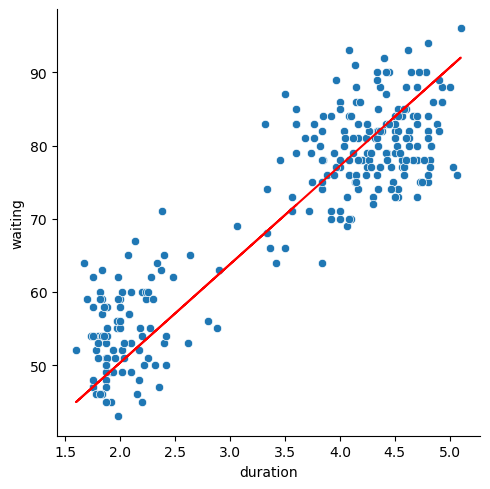

In [34]:
#Question 22
import matplotlib.pyplot as plt
sns.relplot( data = geyser2 , x = 'duration' , y = 'waiting')
plt.plot( geyser2['duration'], geyser2['waiting_predicted'], 'red')

This line does agree with the line that I sketched in Question 20 because by looking at it, it appears to have a similar slope and y-intercept value. 

In [36]:
#Question 23
geyser2['error'] = geyser2['waiting'] - geyser2['waiting_predicted']
geyser2['squared_error'] = geyser2['error']**2
print(geyser2["squared_error"].mean())

44.5635827764706


The mean squared error of this line is 44.5635827764706.

In [39]:
#Question 24
geyser3 = sns.load_dataset('geyser')
X=geyser3['duration']
Y=geyser3['waiting']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .5, random_state = 1)

<AxesSubplot: xlabel='duration', ylabel='waiting'>

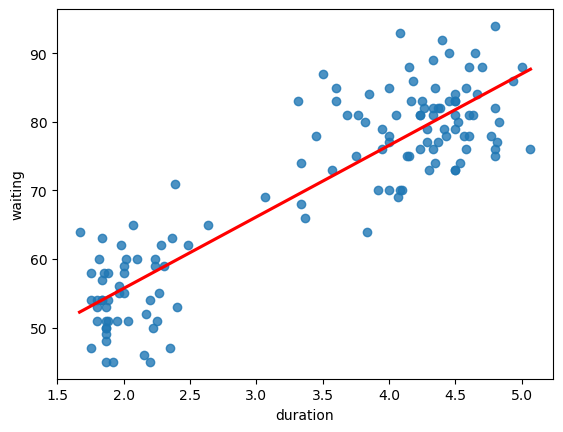

In [41]:
#Question 25
sns.regplot( data = geyser3, x=X_train, y=Y_train, order = 1 , ci = None, line_kws={'color':'red'} )

In [42]:
#Question 26
lin_model = LinearRegression().fit(X_train.to_numpy().reshape(-1,1), Y_train )
m = lin_model.coef_[0]
b = lin_model.intercept_
print(f'Best fit line is {round(m,3)}x + {round(b,3)}')

Best fit line is 10.42x + 34.889


Compared to the best fit line that I created, the slope of the calculated best fit line has a smaller slope and a greater y-intercept value. 

In [46]:
#Question 27
Y_predictedtrain=lin_model.predict(X_train.to_numpy().reshape(-1,1))
df = pd.DataFrame(X_train)
df['Known'] = Y_train
df['Predicted'] = Y_predictedtrain
print('MSE = ' + str(mse(df['Known'],df['Predicted'])))

MSE = 37.44092688057394


This MSE is smaller than the MSE I found in Question 23, which indicates that the calculated line of best fit is a better fit to the data than the line of best fit I created by hand. 

In [47]:
#Question 28
Y_predictedtest=lin_model.predict(X_test.to_numpy().reshape(-1,1))
df2 = pd.DataFrame(X_test)
df2['Known'] = Y_test
df2['Predicted'] = Y_predictedtest
print('MSE = ' + str(mse(df2['Known'],df2['Predicted'])))

MSE = 32.4699582881455


This MSE is smaller than the MSE I found in Question 27, which indicates that the calculated line of best fit with the training data is a better fit to the training data than the testing data. 